In [194]:
# Data
import pandas as pd
import numpy as np
import statistics
from IPython.display import display
pd.options.display.max_columns = None

# ML

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5, style="ticks")
fs = (14, 6) # make the figure wider than the default
pd.set_option('display.max_rows', 1000)

In [195]:
df_train = pd.read_csv('Ames_HousePrice.csv',index_col=0)

In [196]:
df_raw=df_train.copy()

In [197]:
df_train.shape

(2580, 81)

In [198]:
#Check the number of NAs in each column
df_train.isna().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF  

In [199]:
target=df_train.SalePrice

In [200]:
test_ids=df_train.PID

In [201]:
df_train=df_train.drop(columns=['PID', 'SalePrice'])

In [202]:
df_train_copy=df_train.copy()

In [203]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   MSSubClass     2580 non-null   int64  
 2   MSZoning       2580 non-null   object 
 3   LotFrontage    2118 non-null   float64
 4   LotArea        2580 non-null   int64  
 5   Street         2580 non-null   object 
 6   Alley          168 non-null    object 
 7   LotShape       2580 non-null   object 
 8   LandContour    2580 non-null   object 
 9   Utilities      2580 non-null   object 
 10  LotConfig      2580 non-null   object 
 11  LandSlope      2580 non-null   object 
 12  Neighborhood   2580 non-null   object 
 13  Condition1     2580 non-null   object 
 14  Condition2     2580 non-null   object 
 15  BldgType       2580 non-null   object 
 16  HouseStyle     2580 non-null   object 
 17  OverallQual    2580 non-null   int64  
 18  OverallCo

In [204]:
cols_list=list(df_train.columns)
cols_list

['GrLivArea',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [205]:
#MSSUBClass is actually a categoical data coluumn per the data descrpition text file
df_train.MSSubClass=df_train.MSSubClass.astype(str)

In [206]:
#looking at columns that consist of numberic values only
df_num = df_train.select_dtypes("number")
df_num
#df_train._get_numeric_data()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,856,NaN,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
2,1049,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
3,1001,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007
4,1039,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009
5,1665,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,NaN,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5,2009
760,1733,NaN,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,6,2009
761,2002,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007
762,1842,NaN,8826,7,5,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,486.0,193,96,0,0,0,0,0,7,2007


In [207]:
top_corr_features=df_train.corrwith(target.sort_values(ascending=False))
top_corr_features

GrLivArea        0.261843
LotFrontage      0.133117
LotArea          0.098377
OverallQual      0.275495
OverallCond     -0.053789
YearBuilt        0.181887
YearRemodAdd     0.152432
MasVnrArea       0.174240
BsmtFinSF1       0.159489
BsmtFinSF2       0.015708
BsmtUnfSF        0.069088
TotalBsmtSF      0.239318
1stFlrSF         0.240617
2ndFlrSF         0.088125
LowQualFinSF    -0.002958
BsmtFullBath     0.101427
BsmtHalfBath    -0.030808
FullBath         0.183613
HalfBath         0.091997
BedroomAbvGr     0.046615
KitchenAbvGr    -0.050015
TotRmsAbvGrd     0.169427
Fireplaces       0.172674
GarageYrBlt      0.168799
GarageCars       0.222017
GarageArea       0.230033
WoodDeckSF       0.088549
OpenPorchSF      0.100757
EnclosedPorch   -0.033832
3SsnPorch        0.020370
ScreenPorch      0.055926
PoolArea         0.010206
MiscVal         -0.019026
MoSold          -0.001848
YrSold           0.008522
dtype: float64

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
GrLivArea,1.000000,0.345448,0.260322,0.559897,-0.105670,0.228400,0.306035,0.387206,0.164899,-0.021056,0.245545,0.409814,0.539135,0.665001,0.088931,0.044749,-0.053401,0.643937,0.445513,0.538022,0.129797,0.807445,0.457926,0.266934,0.495011,0.477152,0.247716,0.321777,0.000196,0.008714,0.097835,0.057935,-0.003940,0.038389,-0.008260
LotFrontage,0.345448,1.000000,0.463720,0.179656,-0.054048,0.099602,0.063548,0.202139,0.177304,0.055247,0.104167,0.307885,0.437324,0.005644,-0.010623,0.106641,-0.028832,0.169696,0.026992,0.247952,0.018644,0.342825,0.249181,0.051578,0.302285,0.337158,0.123743,0.142809,0.003480,0.034406,0.083849,0.086041,0.017859,0.002164,-0.002555
LotArea,0.260322,0.463720,1.000000,0.080607,-0.032693,0.012397,0.010293,0.103416,0.163468,0.082339,0.019738,0.222042,0.313086,0.022434,-0.000334,0.118788,0.027586,0.124352,0.026727,0.140430,-0.014575,0.204545,0.245148,-0.016526,0.175733,0.199241,0.155687,0.084963,0.017694,0.017721,0.053820,0.052636,0.040220,0.010203,-0.017319
OverallQual,0.559897,0.179656,0.080607,1.000000,-0.095927,0.574400,0.546297,0.405763,0.273919,-0.030383,0.255698,0.528069,0.454481,0.246885,-0.044359,0.173342,-0.050571,0.508255,0.271455,0.067466,-0.153691,0.360675,0.387777,0.558484,0.581023,0.538183,0.250181,0.286861,-0.134291,0.014226,0.049277,-0.002484,-0.025825,0.016780,0.005668
OverallCond,-0.105670,-0.054048,-0.032693,-0.095927,1.000000,-0.397274,0.065100,-0.143986,-0.064347,0.029990,-0.123998,-0.179473,-0.156592,0.015073,0.019018,-0.057921,0.085160,-0.210226,-0.096052,0.004108,-0.075642,-0.072482,-0.046570,-0.335619,-0.195780,-0.168238,0.014161,-0.067437,0.085910,0.041904,0.050417,-0.021193,0.046015,0.012211,0.017632
YearBuilt,0.228400,0.099602,0.012397,0.574400,-0.397274,1.000000,0.572276,0.307228,0.303616,-0.009807,0.092171,0.400983,0.294691,0.015754,-0.132086,0.229570,-0.028800,0.450065,0.272979,-0.048768,-0.136983,0.095450,0.167188,0.834526,0.519494,0.463175,0.227289,0.179654,-0.360933,0.009513,-0.042655,0.004925,-0.027354,-0.007534,0.015349
YearRemodAdd,0.306035,0.063548,0.010293,0.546297,0.065100,0.572276,1.000000,0.175371,0.156527,-0.051202,0.130649,0.271944,0.217709,0.166301,-0.063714,0.147388,-0.048623,0.434877,0.209656,-0.016713,-0.145110,0.185204,0.123843,0.625360,0.398114,0.348446,0.218273,0.226677,-0.205205,0.028543,-0.043130,-0.018693,-0.016669,0.002476,0.064046
MasVnrArea,0.387206,0.202139,0.103416,0.405763,-0.143986,0.307228,0.175371,1.000000,0.277336,-0.009519,0.080283,0.361515,0.362168,0.131230,-0.054146,0.129113,0.002436,0.256022,0.200375,0.104135,-0.040105,0.261740,0.247347,0.246120,0.348303,0.348993,0.149177,0.120976,-0.103015,0.011669,0.064176,-0.003808,-0.021950,-0.006574,-0.019894
BsmtFinSF1,0.164899,0.177304,0.163468,0.273919,-0.064347,0.303616,0.156527,0.277336,1.000000,-0.058911,-0.480927,0.512642,0.426763,-0.180968,-0.070774,0.632603,0.067414,0.084518,-0.023827,-0.106504,-0.105860,0.016554,0.278672,0.214492,0.261766,0.298309,0.217422,0.100385,-0.107396,0.044348,0.102109,0.017784,0.014571,-0.003877,0.014207
BsmtFinSF2,-0.021056,0.055247,0.082339,-0.030383,0.029990,-0.009807,-0.051202,-0.009519,-0.058911,1.000000,-0.242334,0.110119,0.094029,-0.107159,-0.004431,0.169453,0.101400,-0.072700,-0.037019,-0.041332,-0.041383,-0.053228,0.055734,-0.046385,-0.004548,0.016331,0.101179,-0.017555,0.011894,-0.023102,0.055724,0.057697,-0.003980,-0.002769,0.001040


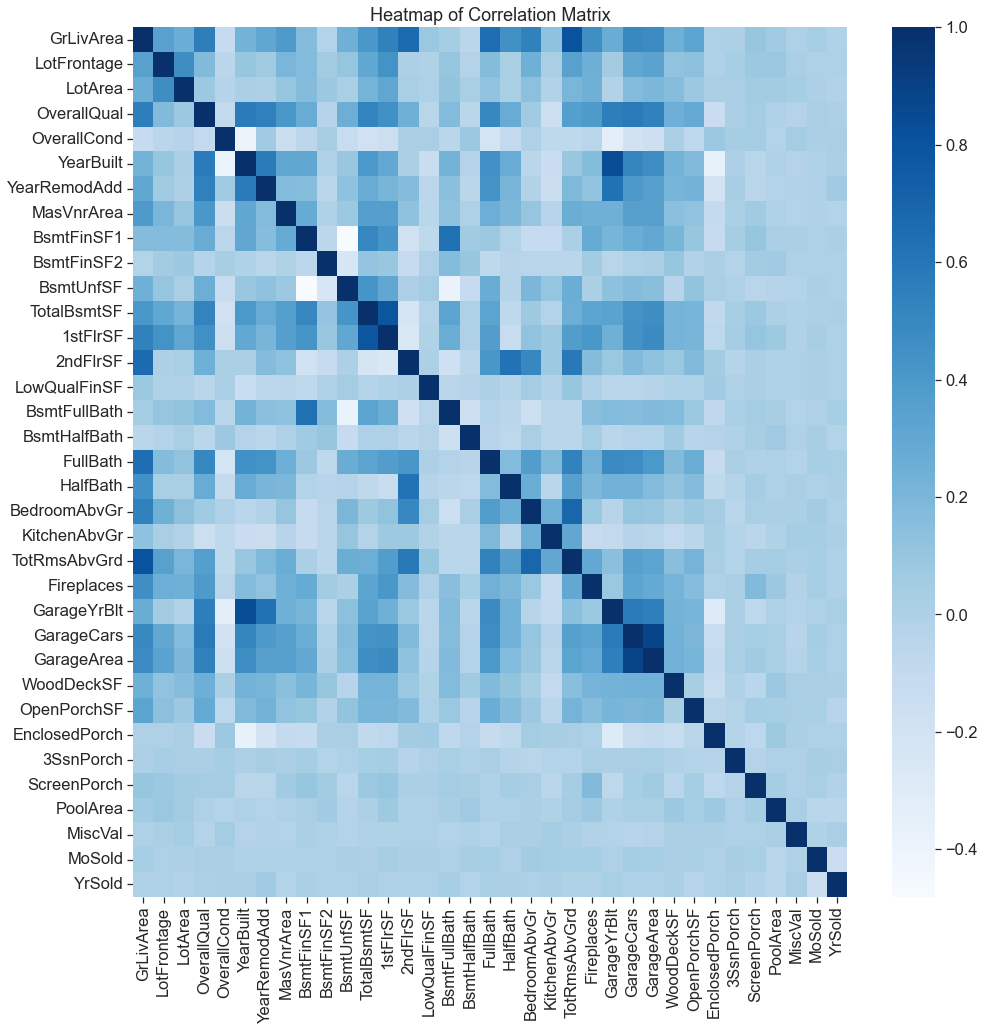

In [208]:
corr=df_train.corr()
plt.figure(figsize = (16, 16))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues")

plt.title('Heatmap of Correlation Matrix')
corr

In [209]:
high_corr_pairs = np.where(abs(corr) > 0.75)
high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs)
                                        if x != y and x < y]
high_corr_pairs

[('GrLivArea', 'TotRmsAbvGrd'),
 ('YearBuilt', 'GarageYrBlt'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('GarageCars', 'GarageArea')]

In [210]:
#Dropping numerical columns of which have high correaltion with one another
df_train=df_train.drop(["TotRmsAbvGrd","GarageYrBlt","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF"],axis=1)

In [211]:
df_train.shape


(2580, 70)

In [212]:
#Show all column names with missing values
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [213]:
#Show all categorical/object columns with missing values
df_train.select_dtypes("object").isna().sum()!=0

MSSubClass       False
MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleConditi

In [214]:
#Fill NAs in these columns with None when a missing value means something
#e.g. NA basement means no basement

for column in ["Alley",
               "BsmtQual",
               "BsmtCond",
               "BsmtExposure",
               "BsmtFinType1",
               "BsmtFinType2",
               "FireplaceQu",
               "GarageType",
               "GarageFinish",
               "GarageQual",
               "GarageCond",
               "PoolQC",
               "Fence",
               "MiscFeature"]:
    df_train[column]=df_train[column].fillna("None")

In [215]:
#Fill NAs in these columns with mode
for column in ["MasVnrType","Electrical"]:
    df_train[column]=df_train[column].fillna(df_train[column].mode()[0])

In [216]:
df_train.select_dtypes("object").isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [217]:
#Numerical Data impute and clean up with mean
df_train.select_dtypes("number").isna().sum()

GrLivArea          0
LotFrontage      462
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        14
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Fireplaces         0
GarageCars         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [218]:
#Fill NAs in these columns with mean
for column in ["MasVnrArea","TotalBsmtSF"]:
    df_train[column]=df_train[column].fillna(df_train[column].mean())

In [219]:
#Fill NAs in these columns with median because it's more approirate 
#i.e. number of bathrooms/cars in interger 
for column in ["BsmtFullBath","BsmtHalfBath","GarageCars"]:
    df_train[column]=df_train[column].fillna(df_train[column].median())

In [220]:
#Fill median value of lot frontage grouped by neighborhood 
df_train.groupby("Neighborhood").LotFrontage.median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.5
ClearCr    81.0
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    72.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    70.0
Somerst    72.0
StoneBr    60.0
Timber     81.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [221]:
df_train.loc[df_train["Neighborhood"].isin(['Landmrk','GrnHill'])]

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
110,1502,120,RM,NaN,9763,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,ALQ,1502.0,GasA,Ex,Y,SBrkr,1.0,0.0,1,1,1,1,Gd,Typ,1,TA,Attchd,Fin,1.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,9,2007,WD,Normal
684,1295,120,RM,NaN,8239,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,None,None,None,None,None,0.0,GasA,Gd,Y,SBrkr,0.0,0.0,2,0,2,1,Gd,Typ,0,None,Attchd,RFn,1.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,11,2006,WD,Normal
205,1320,160,RH,NaN,3612,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Unf,630.0,GasA,Ex,Y,SBrkr,0.0,0.0,2,1,3,1,TA,Typ,0,None,Detchd,Unf,2.0,TA,TA,Y,0,48,0,0,0,0,None,MnPrv,None,0,6,2006,WD,Normal


In [222]:
#Impute missing values in LotFrontage with the median by Neighborhood 
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train.groupby("Neighborhood")['LotFrontage'].transform('median'))

In [223]:
#Fill the remaining 3NAs of LotFrontage with the Median of all LotFrontage
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())

In [224]:
df_train.select_dtypes("number").isna().sum()

GrLivArea        0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [225]:
df_train.isna().sum()

GrLivArea        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars  

In [226]:
#summarize numerical and categorical variables separately 
df_train.describe(include=[np.number])

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,1486.039922,68.868798,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,1036.686700,0.434884,0.062016,1.550775,0.378295,2.850388,1.04031,0.604264,1.747674,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,488.650181,21.134646,8126.937892,1.367590,1.122008,29.719705,20.490242,175.394322,418.474262,0.518768,0.244424,0.545825,0.499237,0.822863,0.20255,0.648604,0.738551,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,334.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1112.000000,60.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,792.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1436.000000,70.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,979.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,1.000000,2.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1733.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,157.000000,1266.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,4676.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,3206.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,4.000000,5.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [227]:
df_train.describe(include=['O']) #The 'O' stands for objects

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580
unique,16,7,2,3,4,4,2,5,3,28,9,8,5,8,6,7,15,16,4,4,5,6,6,6,5,7,7,6,5,2,4,5,7,6,7,4,6,6,3,5,5,5,10,6
top,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,939,2008,2570,2412,1641,2337,2578,1886,2458,410,2228,2555,2139,1288,2059,2544,868,856,1573,1636,2232,1140,1166,2316,1708,753,2180,2540,1293,2417,2366,1358,2399,1241,1527,1112,2312,2356,2336,2571,2055,2483,2392,2414


In [228]:
df_train.select_dtypes("number")

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,856,60.0,7890,6,6,1939,1950,0.0,856.0,1.0,0.0,1,0,2,1,1,2.0,0,0,0,0,166,0,0,3,2010
2,1049,42.0,4235,5,5,1984,1984,149.0,1049.0,1.0,0.0,2,0,2,1,0,1.0,0,105,0,0,0,0,0,2,2009
3,1001,60.0,6060,5,9,1930,2007,0.0,837.0,0.0,0.0,1,0,2,1,0,1.0,154,0,42,86,0,0,0,11,2007
4,1039,80.0,8146,4,8,1900,2003,0.0,405.0,0.0,0.0,1,0,2,1,0,1.0,0,0,168,0,111,0,0,5,2009
5,1665,70.0,8400,8,6,2001,2001,0.0,810.0,1.0,0.0,2,1,3,1,0,2.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,51.5,8854,6,6,1916,1950,0.0,952.0,0.0,0.0,1,0,2,1,1,1.0,0,98,0,0,40,0,0,5,2009
760,1733,65.0,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,2,0,4,1,1,2.0,0,0,0,0,0,0,0,6,2009
761,2002,82.0,6270,5,6,1949,1950,0.0,1001.0,0.0,0.0,2,0,4,2,0,3.0,0,0,0,0,0,0,0,8,2007
762,1842,70.0,8826,7,5,2000,2000,144.0,985.0,1.0,0.0,2,1,3,1,1,2.0,193,96,0,0,0,0,0,7,2007


In [229]:
numeric_cols=df_train.select_dtypes("number").columns

In [230]:
numeric_cols=pd.DataFrame(numeric_cols,columns=["Features"])
numeric_cols

,Features
0,GrLivArea
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,TotalBsmtSF
9,BsmtFullBath


In [231]:
from scipy import stats
import scipy.stats
from scipy.stats import boxcox
from scipy.special import boxcox1p
from sklearn import linear_model
scipy.stats.skew(df_train.select_dtypes("number"))

array([ 0.97949483,  1.13817613, 13.06594054,  0.18699771,  0.62435313,
       -0.59782952, -0.43714372,  2.67125462,  0.51494657,  0.52862064,
        3.7903816 ,  0.20599242,  0.66962427,  0.25366172,  4.5286104 ,
        0.73477173, -0.19127454,  1.84594824,  2.6037833 ,  4.03944974,
       11.82338566,  3.98830739, 19.8851274 , 21.27686429,  0.23279759,
        0.09292702])

In [232]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew
#0 means no skew and normally distributed
#+ve number means right skew
#-ve number means left skew

,Features,Skewness
0,GrLivArea,0.979495
1,LotFrontage,1.138176
2,LotArea,13.065941
3,OverallQual,0.186998
4,OverallCond,0.624353
5,YearBuilt,-0.597830
6,YearRemodAdd,-0.437144
7,MasVnrArea,2.671255
8,TotalBsmtSF,0.514947
9,BsmtFullBath,0.528621


In [233]:
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])
df_skew

,Features,Skewness,Absolute_Skew
0,GrLivArea,0.979495,0.979495
1,LotFrontage,1.138176,1.138176
2,LotArea,13.065941,13.065941
3,OverallQual,0.186998,0.186998
4,OverallCond,0.624353,0.624353
5,YearBuilt,-0.597830,0.597830
6,YearRemodAdd,-0.437144,0.437144
7,MasVnrArea,2.671255,2.671255
8,TotalBsmtSF,0.514947,0.514947
9,BsmtFullBath,0.528621,0.528621


In [234]:
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)
#Looks like half of the features are skewed.... (Absolute Skew>0.75)
df_skew.sort_values("Absolute_Skew")

,Features,Skewness,Absolute_Skew,Skewed
25,YrSold,0.092927,0.092927,False
3,OverallQual,0.186998,0.186998,False
16,GarageCars,-0.191275,0.191275,False
11,FullBath,0.205992,0.205992,False
24,MoSold,0.232798,0.232798,False
13,BedroomAbvGr,0.253662,0.253662,False
6,YearRemodAdd,-0.437144,0.437144,False
8,TotalBsmtSF,0.514947,0.514947,False
9,BsmtFullBath,0.528621,0.528621,False
5,YearBuilt,-0.597830,0.597830,False


In [235]:
df_skew[df_skew.Skewed==True].Features.values
#get all the features which are skewed

array(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype=object)

In [236]:
df_skew[df_skew.Skewed==True].Features

0         GrLivArea
1       LotFrontage
2           LotArea
7        MasVnrArea
10     BsmtHalfBath
14     KitchenAbvGr
17       WoodDeckSF
18      OpenPorchSF
19    EnclosedPorch
20        3SsnPorch
21      ScreenPorch
22         PoolArea
23          MiscVal
Name: Features, dtype: object

In [237]:
#Check to see how those skewed columns are distributed
df_train[df_skew[df_skew.Skewed==True].Features.values].describe()

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,1486.039922,68.868798,10120.153488,99.308262,0.062016,1.04031,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395
std,488.650181,21.134646,8126.937892,175.394322,0.244424,0.20255,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058
min,334.000000,21.000000,1300.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1112.000000,60.000000,7406.750000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1436.000000,70.000000,9391.000000,0.000000,0.000000,1.00000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1733.000000,80.000000,11494.000000,157.000000,0.000000,1.00000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4676.000000,313.000000,215245.000000,1600.000000,2.000000,3.00000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000


In [238]:
df_before_feature_transformed=df_train.copy()

In [239]:
df_skewed_features=df_train[df_skew[df_skew.Skewed==True].Features.values]
df_skewed_features

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,856,60.0,7890,0.0,0.0,1,0,0,0,0,166,0,0
2,1049,42.0,4235,149.0,0.0,1,0,105,0,0,0,0,0
3,1001,60.0,6060,0.0,0.0,1,154,0,42,86,0,0,0
4,1039,80.0,8146,0.0,0.0,1,0,0,168,0,111,0,0
5,1665,70.0,8400,0.0,0.0,1,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,51.5,8854,0.0,0.0,1,0,98,0,0,40,0,0
760,1733,65.0,13680,0.0,0.0,1,0,0,0,0,0,0,0
761,2002,82.0,6270,0.0,0.0,2,0,0,0,0,0,0,0
762,1842,70.0,8826,144.0,0.0,1,193,96,0,0,0,0,0


In [240]:
lam = 0.15
for col in df_skewed_features.columns:
    df_train[col]=boxcox1p(df_train[col], lam)

In [241]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)
df_skew.sort_values("Absolute_Skew",ascending=False)
#The number of skewed feaetures has gone down from 13 to 8
#after the BoxCox1p transformation

,Features,Skewness,Absolute_Skew,Skewed
22,PoolArea,17.196323,17.196323,True
20,3SsnPorch,9.289242,9.289242,True
23,MiscVal,5.390692,5.390692,True
14,KitchenAbvGr,4.008220,4.008220,True
10,BsmtHalfBath,3.706005,3.706005,True
21,ScreenPorch,2.980675,2.980675,True
19,EnclosedPorch,2.006053,2.006053,True
1,LotFrontage,-0.821385,0.821385,True
15,Fireplaces,0.734772,0.734772,False
12,HalfBath,0.669624,0.669624,False


In [242]:
df_train=pd.get_dummies(df_train, drop_first=True)
df_train

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Mi

In [243]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler() #give each column the same range of values and centered around 0
standard.fit(df_train)
df_train=pd.DataFrame(standard.transform(df_train), index=df_train.index, columns=df_train.columns)
df_train

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Mi

In [244]:
#In production, use pipeline to encode and standard scale
#pd.get_dummies(df_test)
#
#df_dummmied=pd.get_dummies()
#pipe = Pipeline(
#    [("standardize", StandardScaler()), ("df_dummmied", df_dummmied)])


<AxesSubplot:>

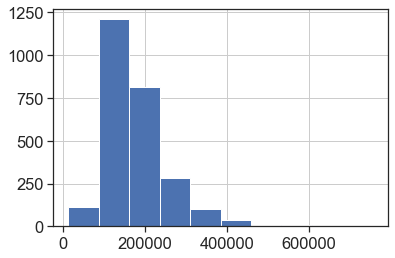

In [245]:
target.hist()
#the target Sale Price is right skewed

C:\Users\rauna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rauna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


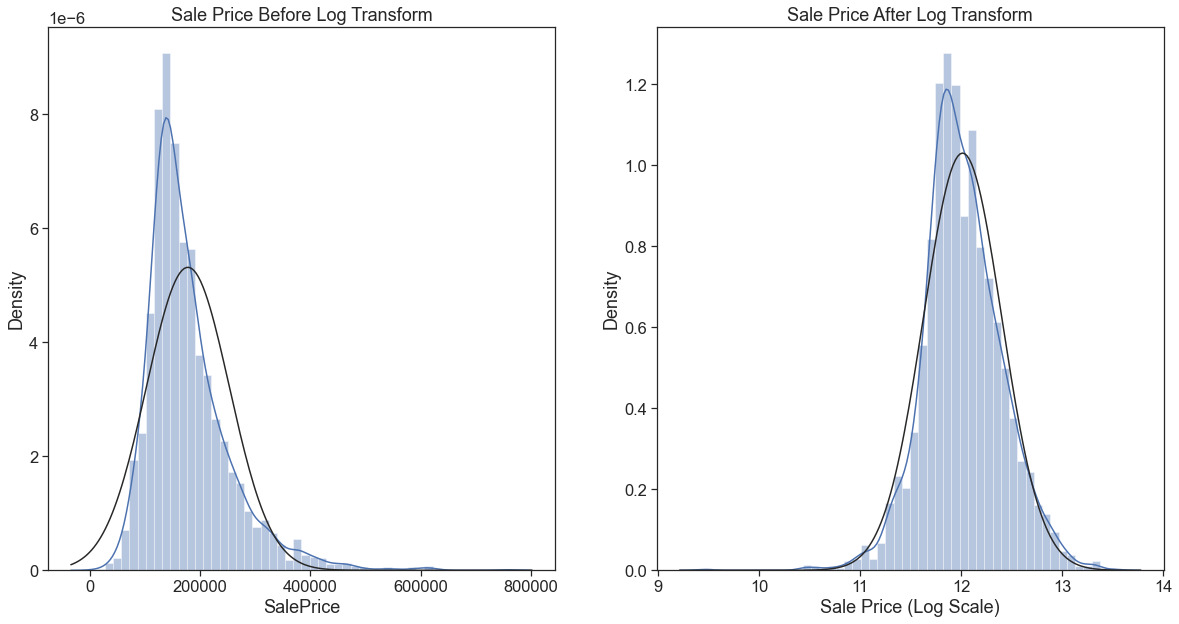

In [246]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Sale Price Before Log Transform")
sns.distplot(target,fit=scipy.stats.norm)
#the data's density plot does not lie up with a normal distrubtion very well

plt.subplot(1, 2, 2)
plt.title("Sale Price After Log Transform")
sns.distplot(np.log(target),fit=scipy.stats.norm)
plt.xlabel("Sale Price (Log Scale)")
#the data's density plot fits much better with a normal distrubtion after the log transmation
plt.show()

In [299]:
log_target=np.log(target)
np.exp(log_target)
#We're going to predict on the log Sale Price

1      126000.0
2      139500.0
3      124900.0
4      114000.0
5      227000.0
         ...   
759    121000.0
760    139600.0
761    145000.0
762    217500.0
763    215000.0
Name: SalePrice, Length: 2580, dtype: float64

In [298]:
log_target

1      11.744037
2      11.845820
3      11.735269
4      11.643954
5      12.332705
         ...    
759    11.703546
760    11.846536
761    11.884489
762    12.289954
763    12.278393
Name: SalePrice, Length: 2580, dtype: float64

In [248]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(df_train,log_target)

LinearRegression()

In [249]:
ols.intercept_

12.013473787587431

In [250]:
ols.coef_.shape #the number of elements match the number of columns 

(272,)

In [251]:
ols.score(df_train,log_target)

0.9449845984418412

In [252]:
# Building a Model


In [253]:
df_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Mi

In [254]:
target.head()

1    126000
2    139500
3    124900
4    114000
5    227000
Name: SalePrice, dtype: int64

R^2 is equal to 0.928490
RSS is equal to 1038248482735.695
The intercept is 178059.623


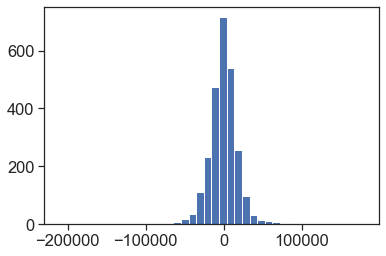

In [282]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df_train, target)
residuals = target - lm.predict(df_train)
plt.hist(residuals,bins=40)
print('R^2 is equal to %.6f' %(lm.score(df_train, target)))
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))

<function matplotlib.pyplot.show(close=None, block=None)>

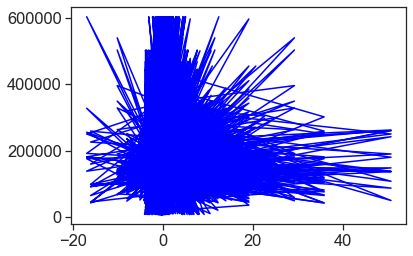

In [283]:

plt.plot(df_train,lm.predict(df_train),color = 'blue')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show

In [256]:
import statsmodels.api as sm
x = sm.add_constant(df_train)
model = sm.OLS(log_target, x).fit()
print(model.summary())

C:\Users\rauna\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     149.4
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:09:22   Log-Likelihood:                 2527.9
No. Observations:                2580   AIC:                            -4522.
Df Residuals:                    2313   BIC:                            -2958.
Df Model:                         266                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.01

In [257]:
pValues = model.pvalues
sig = pValues[pValues<.05]
unsig = pValues[pValues>.05]

In [258]:
unsig

LotFrontage              0.781275
MasVnrArea               0.334444
HalfBath                 0.085136
KitchenAbvGr             0.063204
OpenPorchSF              0.766932
3SsnPorch                0.503481
PoolArea                 0.152829
MiscVal                  0.566440
MoSold                   0.234882
MSSubClass_150           0.187565
MSSubClass_180           0.280371
MSSubClass_190           0.969890
MSSubClass_20            0.820581
MSSubClass_30            0.545632
MSSubClass_40            0.814032
MSSubClass_45            0.654914
MSSubClass_50            0.657120
MSSubClass_60            0.492103
MSSubClass_70            0.897539
MSSubClass_75            0.604587
MSSubClass_80            0.202798
MSSubClass_85            0.784670
MSSubClass_90            0.155407
MSZoning_C (all)         0.086469
MSZoning_FV              0.772526
MSZoning_I (all)         0.585580
MSZoning_RH              0.809908
MSZoning_RL              0.830129
MSZoning_RM              0.615464
Street_Pave   

In [259]:
df_train_sig = df_train.copy()

In [260]:
list(sig.keys())

['const',
 'GrLivArea',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'MSSubClass_160',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition2_PosN',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Exterior1st_BrkFace',
 'Exterior1st_PreCast',
 'Exterior2nd_CmentBd',
 'Exterior2nd_PreCast',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_PConc',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_Po',
 'BsmtQual_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'Bs

In [261]:
sig_var = list(sig.keys())
all_var = df_train.columns.tolist()

In [262]:
for col in all_var:
    if col not in sig_var:
        df_train_sig = df_train_sig.drop(col,axis=1)

In [263]:
df_train_sig.shape

(2580, 81)

In [264]:
target.shape

(2580,)

(array([  1.,   7.,  30.,  77., 129., 263., 442., 376., 266., 248., 168.,
        133.,  98.,  85.,  65.,  33.,  42.,  26.,  15.,  21.,  12.,  12.,
          5.,   6.,   7.,   1.,   2.,   0.,   2.,   1.,   1.,   1.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 12778.08192986,  31333.29402529,  49888.50612072,  68443.71821615,
         86998.93031158, 105554.14240701, 124109.35450244, 142664.56659787,
        161219.7786933 , 179774.99078873, 198330.20288416, 216885.41497959,
        235440.62707503, 253995.83917046, 272551.05126589, 291106.26336132,
        309661.47545675, 328216.68755218, 346771.89964761, 365327.11174304,
        383882.32383847, 402437.5359339 , 420992.74802933, 439547.96012476,
        458103.17222019, 476658.38431562, 495213.59641105, 513768.80850648,
        532324.02060191, 550879.23269734, 569434.44479277, 587989.65688821,
        606544.86898364, 625100.08107907, 643655.2931745 , 662210.50526993,
        680765.71736536, 699320.92946079, 

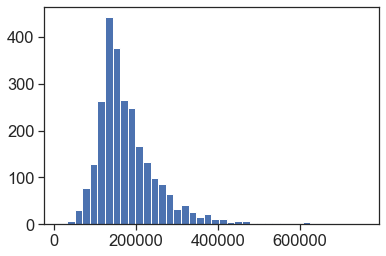

In [265]:
lm2 = LinearRegression()
lm2.fit(df_train_sig, log_target)
residuals2 = target - lm2.predict(df_train_sig)
plt.hist(residuals2,bins=40)

In [272]:
df_train_sig.shape

(2580, 81)

In [280]:
df_train_sig

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,EnclosedPorch,ScreenPorch,YrSold,MSSubClass_160,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blueste,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition2_PosN,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_BrkFace,Exterior1st_PreCast,Exterior2nd_CmentBd,Exterior2nd_PreCast,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Po,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_TA,CentralAir_Y,Electrical_FuseP,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Sal,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_None,GarageCond_Po,PavedDrive_Y,MiscFeature_Othr,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
1,-1.514117,-0.256266,-0.033733,0.339988,-1.053847,-1.647539,-0.431859,1.089555,-0.25474,-1.009265,-1.033650,0.610254,0.341716,-0.941444,-0.426658,3.162487,1.647483,-0.220863,-0.176565,-0.071164,-0.062378,-0.193376,-0.261387,-0.055771,-0.027853,-0.163283,-0.221826,-0.242237,-0.130189,0.397479,-0.086133,-0.120622,-0.03412,-0.166998,-0.218926,-0.178885,-0.019691,-0.19765,-0.019691,-0.120622,-0.704642,2.447830,-0.695422,0.759616,-0.865536,-0.176565,-0.846503,-0.027853,1.101223,-0.321725,-0.301511,0.714520,-0.238629,2.955647,-0.613787,-0.183450,1.536026,0.259690,-0.052159,-0.156916,-0.806642,0.948606,-0.052159,-0.019691,0.274678,-1.204219,-0.251079,1.613491,-0.229416,-0.211032,-0.092739,-0.229416,-0.039406,0.340466,-0.229416,-0.065436,0.323190,-0.03412,-0.039406,0.262232,-0.18118
2,-0.921493,-1.394813,-0.765088,-0.551444,0.460593,0.012109,0.029430,1.089555,-0.25474,0.823179,-1.033650,-0.931817,-1.012549,-0.941444,-0.426658,-0.308021,0.885334,-0.220863,-0.176565,-0.071164,-0.062378,-0.193376,3.825750,-0.055771,-0.027853,-0.163283,-0.221826,-0.242237,-0.130189,0.397479,-0.086133,-0.120622,-0.03412,-0.166998,-0.218926,-0.178885,-0.019691,-0.19765,-0.019691,-0.120622,-0.704642,-0.408525,1.437977,-1.316454,-0.865536,-0.176565,1.181331,-0.027853,-0.908081,-0.321725,3.316625,-1.399541,-0.238629,-0.338335,-0.613787,-0.183450,1.536026,0.259690,-0.052159,-0.156916,1.239707,-1.054179,-0.052159,-0.019691,0.274678,0.830414,-0.251079,-0.619774,-0.229416,-0.211032,-0.092739,-0.229416,-0.039406,0.340466,-0.229416,-0.065436,0.323190,-0.03412,-0.039406,0.262232,-0.18118
3,-1.059627,-0.752152,-0.765088,3.014285,-1.356735,1.134812,-0.477270,-0.838464,-0.25474,-1.009265,-1.033650,-0.931817,-1.012549,0.947157,1.479177,-0.308021,-0.638965,-0.220863,-0.176565,-0.071164,-0.062378,-0.193376,-0.261387,-0.055771,-0.027853,-0.163283,-0.221826,-0.242237,-0.130189,0.397479,-0.086133,-0.120622,-0.03412,-0.166998,-0.218926,-0.178885,-0.019691,-0.19765,-0.019691,-0.120622,-0.704642,-0.408525,1.437977,-1.316454,-0.865536,-0.176565,-0.846503,-0.027853,1.101223,-0.321725,-0.301511,0.714520,-0.238629,-0.338335,-0.613787,-0.183450,-0.651031,0.259690,-0.052159,-0.156916,1.239707,-1.054179,-0.052159,-0.019691,0.274678,-1.204219,-0.251079,1.613491,-0.229416,-0.211032,-0.092739,-0.229416,-0.039406,0.340466,-0.229416,15.282194,-3.094151,-0.03412,-0.039406,0.262232,-0.18118
4,-0.949821,-0.194919,-1.496443,2.122852,-2.366362,0.939559,-1.509792,-0.838464,-0.25474,-1.009265,-1.033650,-0.931817,-1.012549,-0.941444,2.486517,2.785828,0.885334,-0.220863,-0.176565,-0.071164,-0.062378,-0.193376,-0.261387,-0.055771,-0.027853,-0.163283,-0.221826,-0.242237,-0.130189,0.397479,-0.086133,-0.120622,-0.03412,-0.166998,-0.218926,-0.178885,-0.019691,-0

In [294]:
df_train_sig.columns

Index(['GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'EnclosedPorch', 'ScreenPorch', 'YrSold', 'MSSubClass_160',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition2_PosN',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Exterior1st_BrkFace',
       'Exterior1st_PreCast', 'Exterior2nd_CmentBd', 'Exterior2nd_PreCast',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_Po', 'BsmtQual_TA', 'Bsmt

<function matplotlib.pyplot.show(close=None, block=None)>

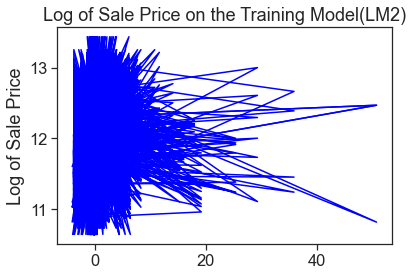

In [278]:

plt.plot(df_train_sig,lm2.predict(df_train_sig),color = 'blue')
plt.title('Log of Sale Price on the Training Model(LM2)')
plt.xlabel('')
plt.ylabel('Log of Sale Price')
plt.show

In [187]:
print('R^2 is equal to %.3f' %(lm2.score(df_train_sig, log_target)))
print('RSS is equal to %.3f' %(np.sum(residuals2**2)))
print('The intercept is %.3f' %(lm2.intercept_))

R^2 is equal to 0.932
RSS is equal to 96307224854641.047
The intercept is 12.013


In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_train, target, test_size=0.5, random_state=2)

In [190]:
print(y_train.mean())
print(y_test.mean())
y_test

176354.28062015504
179764.96589147288


476    124900
516    129850
627    137000
719    118000
640     75190
        ...  
613    187000
122    132250
312    149500
82     110000
43     135000
Name: SalePrice, Length: 1290, dtype: int64

In [191]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import LogisticRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [192]:
ridge.set_params(alpha=1)
ridge.fit(df_train, log_target)
ridge.score(df_train, log_target)

0.944971820548646

In [193]:
lasso.set_params(alpha=1, normalize=True)
lasso.fit(df_train, target)
lasso.score(df_train, target)

0.9268947599854488